<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo III: Aprendizaje supervizado: Regresión Lineal 

## Introducción

El Aprendizaje Supervizado se podría definir como un tipo de aprendizaje en IA en el que un algoritmo es entrenado con variables que incluyen los valores que queremos predecir; a estos valores conocidos se les llama `“etiquetas”` y se usan también para la evaluación del modelo. El aprendizaje supervisado se puede subdividir en dos tipos: 

- Clasificación

- Regresión.

### Clasificación

En cuanto a clasificación, el objetivo es predecir las etiquetas de clase categóricas de nuevos registros, con base en observaciones pasadas. Dependiendo de la etiqueta, se puede decir que la clasificación es binaria o multiclase. 

### Regresión

Respecto a regresión, se trata del proceso estadístico predictivo en el que el modelo intenta predecir un valor continuo (como ventas, precio, calificaciones) mediante la relación entre variables dependientes e independientes. Es decir, se encuentra una ecuación en la que se sustituyen los valores de las variables y como resultado se obtiene el valor a predecir 

### Algunos algortimos de Aprendizaje Supervizado

- **Regresión lineal:** Se trata de una regresión en la que al graficar la ecuación se forma una línea recta. Para obtener dicha ecuación, se usa el método de los cuadrados mínimos.


- **Regresión logística:** Es una regresión usada principalmente en problemas de clasificación binaria. A pesar de la aparente incongruencia, se trata de una regresión porque el resultado de la ecuación es la probabilidad de que pertenezca a una clase, que dependiendo del umbral que se utilice, se clasifica como positivo o negativo.


- **Support Vector Machine (SVM):** Típicamente se usa para problemas de clasificación, pero también se puede usar para regresión. En este algoritmo se construye un hiperplano que separa las clases de datos lo más posible.


- **Árboles de decisión:** Algoritmo de clasificación similar a un diagrama de flujo, en el que se evalúan valores en cada nodo para llegar a una clasificación al final.


- **Random Forest:** Este algoritmo consiste en combinar una gran cantidad de árboles de decisión independientes entre sí para reducir la varianza. Debido al conjunto de árboles, se le dio el nombre de “bosque”.



## Regresión Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/ex1data1.txt', names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Ganancia [y]')

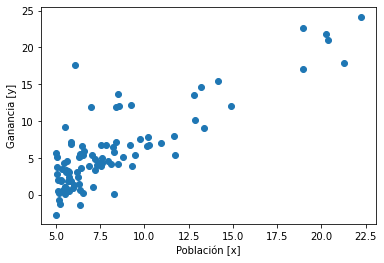

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'].values,data['profit'].values)
plt.xlabel('Población [x]')
plt.ylabel('Ganancia [y]')

El objetivo es estimar el modelo:

$$ \hat{y} = \beta_1 x + \beta_0$$

donde $\beta_1$ es la pendiente y $\beta_0$ es la distancia de la intersección con el eje y.

Podemos estima mediante una ecuación matricial:

$$y=X\beta$$

$$X=[x;1]$$
$$\beta=[\beta_1 \beta_0]$$


In [4]:
X_df = data[['population']]
y_df = data[['profit']]
m = len(X_df)
m

97

In [5]:
#X = [1, X_df]
#beta = [beta0, beta1]
# y_hat = X*beta

# Implementar la función de costo 

Formalmente definimos la funcion de costo como el error cuadrático medio, qué deberemos minimizar.

$$ J(\beta) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}(x_i) - y_i)^2$$

$\beta = [\beta_0, \beta_1]$

si derivamos parcialmente e igualamos a cero $\frac{\partial J(\beta)}{\partial \beta}=0$



tendríamos que las ecuaciones del algoritmo de gradiente descendente son:

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



In [6]:
def cost_function(X, y, beta):
    m = len(y)
    #Calcular la función de costo que es el error cuyadrático medio (MSE)
    J = np.sum((X.dot(beta) - y)**2)/(2*m)
    return J

$$X=[1;x]$$
$$\beta=[\beta_0;\beta_1]$$
$$\hat{y}=X^T\beta = \beta_1 x +\beta_0$$


In [7]:
X_df['intercep'] = 1
X_df

,population,intercep
0,6.1101,1
1,5.5277,1
2,8.5186,1
3,7.0032,1
4,5.8598,1
...,...,...
92,5.8707,1
93,5.3054,1
94,8.2934,1
95,13.3940,1


In [8]:
X = X_df.values
X

array([[ 6.1101,  1.    ],
       [ 5.5277,  1.    ],
       [ 8.5186,  1.    ],
       [ 7.0032,  1.    ],
       [ 5.8598,  1.    ],
       [ 8.3829,  1.    ],
       [ 7.4764,  1.    ],
       [ 8.5781,  1.    ],
       [ 6.4862,  1.    ],
       [ 5.0546,  1.    ],
       [ 5.7107,  1.    ],
       [14.164 ,  1.    ],
       [ 5.734 ,  1.    ],
       [ 8.4084,  1.    ],
       [ 5.6407,  1.    ],
       [ 5.3794,  1.    ],
       [ 6.3654,  1.    ],
       [ 5.1301,  1.    ],
       [ 6.4296,  1.    ],
       [ 7.0708,  1.    ],
       [ 6.1891,  1.    ],
       [20.27  ,  1.    ],
       [ 5.4901,  1.    ],
       [ 6.3261,  1.    ],
       [ 5.5649,  1.    ],
       [18.945 ,  1.    ],
       [12.828 ,  1.    ],
       [10.957 ,  1.    ],
       [13.176 ,  1.    ],
       [22.203 ,  1.    ],
       [ 5.2524,  1.    ],
       [ 6.5894,  1.    ],
       [ 9.2482,  1.    ],
       [ 5.8918,  1.    ],
       [ 8.2111,  1.    ],
       [ 7.9334,  1.    ],
       [ 8.0959,  1.    ],
 

In [9]:
y = y_df.values.flatten()
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [10]:
beta = np.array([0,0])
beta

array([0, 0])

In [11]:
cost_function(X,y,beta)

32.072733877455676

In [12]:
def gradient_descendente(X, y, beta, alpha, iterations):
    cost_history = []
    m = len(y)
    
    for it in range(iterations):
        #Modelo lineal y_hat = beta0 + beta1*x = X*Beta
        y_hat = X.dot(beta)
        loss = (y_hat - y)
        gradiente = X.T.dot(loss)/m
        
        #Actualización de los valores de beta (algoritmo del gradiente descendente)
        beta = beta - alpha*gradiente
        
        #Obtener la función de costo
        cost = cost_function(X,y,beta)
        cost_history.append(cost)
        
    
    return beta, cost_history
        

In [13]:
#Inicializar los parámetros
it = 2500
alpha = 0.01 #Tasa de entrenamiento (cómo el gradiente a descendiendo hacia el minimo)
beta = np.array([0,0])

#Llamamos el algoritmo del gradiente descendente

beta, cost_hist = gradient_descendente(X, y, beta, alpha, it)

In [14]:
beta # beta = [beta0, beta1]


array([ 1.18864349, -3.85208068])

$$ \hat{y} = 1.18864*x - 3.852$$

In [15]:
cost_hist

[6.737190464870009,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.8900949431173295,
 5.885004158443647,
 5.879932480491418,
 5.874879094762575,
 5.869843911806385,
 5.8648268653129305,
 5.859827889932181,
 5.85484692057229,
 5.849883892376587,
 5.844938740722034,
 5.840011401218361,
 5.8351018097072265,
 5.830209902261388,
 5.825335615183863,
 5.820478885007099,
 5.815639648492154,
 5.810817842627869,
 5.806013404630044,
 5.801226271940628,
 5.7964563822269,
 5.7917036733806535,
 5.7869680835173956,
 5.782249550975539,
 5.777548014315596,
 5.772863412319382,
 5.768195683989214,
 5.76354476854712,
 5.758910605434047,
 5.754293134309077,
 5.749692295048629,
 5.745108027745684,
 5.740540272709012,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333528,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123857,
 5.695757917651815,
 5.691367918863752,
 5.68699373259798,
 5.682635301898707,
 5.678292570015292,


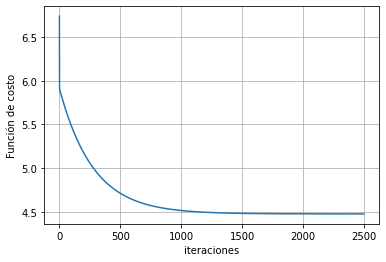

In [16]:
plt.figure(figsize=(6,4))
plt.plot(cost_hist)
plt.xlabel('iteraciones')
plt.ylabel('Función de costo')
plt.grid()

In [17]:
beta

array([ 1.18864349, -3.85208068])

In [18]:
x_lin = np.linspace(5,25,500)
y_hat_num = beta[1] + beta[0]*x_lin

Text(0, 0.5, 'Ganancia [y]')

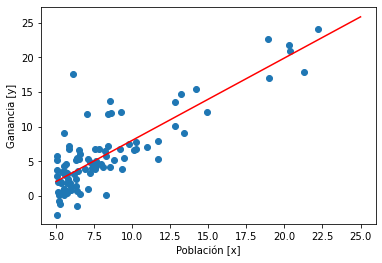

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'].values,data['profit'].values)
plt.plot(x_lin, y_hat_num, '-r')
plt.xlabel('Población [x]')
plt.ylabel('Ganancia [y]')

In [20]:
# Predecir un nuevo valor
x_new = 18
y_predict = np.array([x_new, 1]).dot(beta) # y_hat = X*Beta
y_predict

17.543502055778834

In [21]:
#Predecir n elementos nuevos
X_new = np.array([[17.5, 1],
                  [18, 1],
                  [22.5, 1]])

y_predict = X_new.dot(beta)
y_predict

array([16.94918031, 17.54350206, 22.89239774])

## Realizando el mismo ejemplo Utilizando Librerías de Python (sklearn)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
X = data['population'].values.reshape(-1,1)
y = data['profit'].values.reshape(-1,1)

In [24]:
modelo_lineal = LinearRegression() # instanciar un obj de la clase LinearRegression
modelo_lineal.fit(X,y)             #Entrenar al modelo lineal


LinearRegression()

In [25]:
#Coeficientes del modelo
modelo_lineal.coef_ # beta1

array([[1.19303364]])

In [26]:
modelo_lineal.intercept_ #beta0

array([-3.89578088])

$$ \hat{y} = 1.193*x - 3.895 $$

In [27]:
modelo_lineal.coef_[0]

array([1.19303364])

In [28]:
y_hat_num_sklearn = modelo_lineal.coef_[0]*x_lin + modelo_lineal.intercept_

Text(0, 0.5, 'Ganancia [y]')

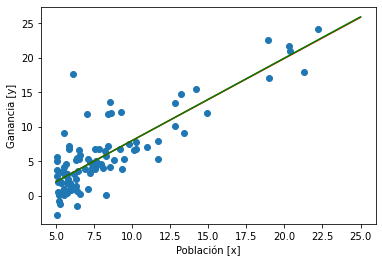

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'].values,data['profit'].values)
plt.plot(x_lin, y_hat_num, '-r')
plt.plot(x_lin, y_hat_num_sklearn, '-g')
plt.xlabel('Población [x]')
plt.ylabel('Ganancia [y]')


In [30]:
#Predicir nuevos valores apartir de el modelo obtenido de la librería
X_new = np.array([[17.5, 25.5, 5.0, 75.2]]).T
X_new

array([[17.5],
       [25.5],
       [ 5. ],
       [75.2]])

In [31]:
modelo_lineal.predict(X_new) # y_hat = X*beta = b0*x + b1

array([[16.9823079 ],
       [26.52657705],
       [ 2.06938734],
       [85.82034916]])

### Regresión Polinomial

In [33]:
datos = pd.read_csv('../Data/Position_Salaries.csv')

In [34]:
datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [37]:
X = datos['Level'].values.reshape(-1,1)
y = datos['Salary'].values.reshape(-1,1)

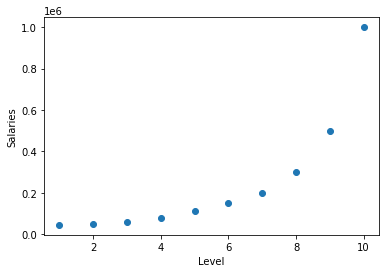

In [38]:
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.show()

In [39]:
#Aplicamos un modelo lineal al conjunto de datos
model = LinearRegression()
#Entrenar al modelo con los datos
model.fit(X,y)
#predecir los valores de X
y_pred = model.predict(X)

$$ \hat{y} = \beta_0 + \beta_1*x$$

In [41]:
model.intercept_, model.coef_

(array([-195333.33333333]), array([[80878.78787879]]))

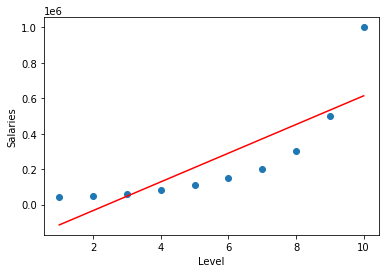

In [42]:
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X,y_pred, 'r')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.show()

In [43]:
# Métricas para evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_pred, y))
rmse

163388.73519272613

In [44]:
r2score = r2_score(y_pred,y)
r2score

0.5053238120653418

### Aplicando una regresion polinomial de grado 2

$$ \hat{y} = \beta_0 + \beta_1 *x + \beta_2 * x^2$$

$X=[1,xi, xi^2], \beta = [\beta_0,\beta_1,\beta_2]$

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [47]:
poly = PolynomialFeatures(degree=2, include_bias = True)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [48]:
#Aplicamos el modelo de regresión 
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)


$$ \hat{y} = \beta_0 + \beta_1 *x + \beta_2 * x^2$$

In [49]:
model_poly.intercept_, model_poly.coef_[0]

(array([232166.66666667]),
 array([      0.        , -132871.21212121,   19431.81818182]))

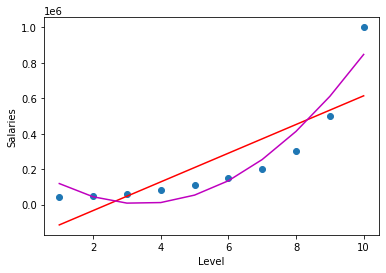

In [51]:
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X,y_pred, 'r')
plt.plot(X,y_pred_poly, 'm')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.show()

In [52]:
np.sqrt(mean_squared_error(y_pred_poly, y))

82212.12400451246

In [53]:
r2_score(y_pred_poly, y)

0.908545049225284

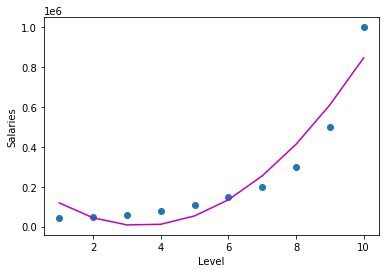

R2Score del modelo de grado 2 : 0.908545049225284


In [59]:
# Aumentando el grado del polinomio
grado = 2
poly = PolynomialFeatures(degree=grado, include_bias = True)
X_poly = poly.fit_transform(X)

#Aplicamos el modelo de regresión 
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X,y_pred_poly, 'm')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.show()

print(f'R2Score del modelo de grado {grado} : {r2_score(y_pred_poly, y)}')

In [62]:
def PolinomialRegresion(X,y,grado=2):
    poly = PolynomialFeatures(degree=grado, include_bias = True)
    X_poly = poly.fit_transform(X)

    #Aplicamos el modelo de regresión 
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    y_pred_poly = model_poly.predict(X_poly)

    plt.figure(figsize=(6,4))
    plt.scatter(X,y)
    plt.plot(X,y_pred_poly, 'm')
    plt.xlabel('Level')
    plt.ylabel('Salaries')
    plt.show()
    
    print(f'Coeficientes del modelo beta0={model_poly.intercept_}, beta_i = {model_poly.coef_[0]}, i!=0')
    print(f'R2Score del modelo de grado {grado} : {r2_score(y_pred_poly, y)}')

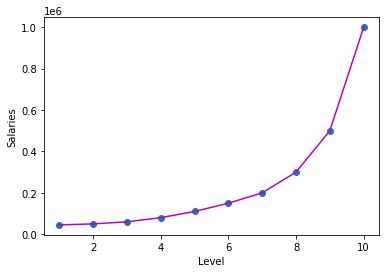

Coeficientes del modelo beta0=[-44792.61261606], beta_i = [ 9.69159715e-01  1.46820296e+05 -1.30633836e+03 -1.34291000e+05
  1.17468485e+05 -4.93479408e+04  1.21106494e+04 -1.81903969e+03
  1.64592976e+02 -8.23590660e+00  1.75046385e-01], i!=0
R2Score del modelo de grado 10 : 1.0


In [64]:
PolinomialRegresion(X,y,10)

## Regresión Lineal Multiple

In [65]:
data = pd.read_csv('../Data/50_Startups.csv')

In [66]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


$$ \hat{y} = \beta_0 + \beta_1 X1 + \beta_2 X2 + \beta_3X3 + \beta_4X4$$

In [69]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [71]:
X['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [75]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [3])])

In [76]:
X_transformer = ct.fit_transform(X.values)


In [77]:
#Matriz de datos de entrada transformados
X_transformer

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [81]:
y.values

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [82]:
#Contruyendo el modelo de reg múltiple
modelo_reg_mult = LinearRegression()
modelo_reg_mult.fit(X_transformer, y)
y_pred_reg_mult = modelo_reg_mult.predict(X_transformer)

In [83]:
#Evaluamos al modelo entrenado
r2_score(y, y_pred_reg_mult)

0.9507524843355148

In [84]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Text(0.5, 0, 'Profit')

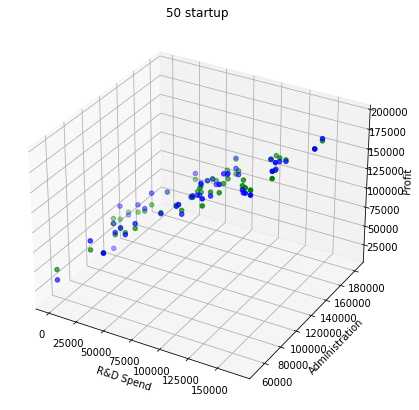

In [87]:
#Visualización de la predicción en 3d R&D Spend y Administration
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')

ax.scatter3D(data.iloc[:,0].values,data.iloc[:,1].values, y, c='b')
ax.scatter3D(data.iloc[:,0].values,data.iloc[:,1].values, y_pred_reg_mult, c='g')

plt.title('50 startup')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')

Text(0.5, 0, 'Profit')

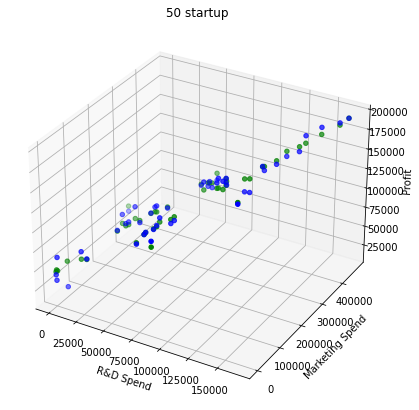

In [88]:
#Visualización de la predicción en 3d R&D Spend y Marketing Spend
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')

ax.scatter3D(data.iloc[:,0].values,data.iloc[:,2].values, y, c='b')
ax.scatter3D(data.iloc[:,0].values,data.iloc[:,2].values, y_pred_reg_mult, c='g')

plt.title('50 startup')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Profit')

### Predecir el profit de una nueva start up

Se tiene una nueva start up y se requiere predecir su profit apartir de los siguientes datos basados en el modelo que se obtuvo anteriormente:

- R&D Spend = 9386.5
- Administration = 101158.3
- Marketing = 127716.8
- La start up se encuentra en California

In [92]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [93]:
X_transformer[1,:]

array([1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53], dtype=object)

In [99]:
X_new = np.array([[1.0, 0.0, 0.0, 9386.5, 101158.3, 127716.8]]) #representación de la nueva start up
X_new

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 9.386500e+03,
        1.011583e+05, 1.277168e+05]])

In [100]:
y_new = modelo_reg_mult.predict(X_new)
y_new

array([58405.15024342])

In [101]:
X_new2 = np.array([[1.0, 0.0, 0.0, 9386.5, 101158.3, 127716.8],
                   [0.0, 1.0, 0.0, 10386.5, 151158.3, 9716.8]]) #representación de la nueva start up
X_new2

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 9.386500e+03,
        1.011583e+05, 1.277168e+05],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 1.038650e+04,
        1.511583e+05, 9.716800e+03]])

In [103]:
y_new2 = modelo_reg_mult.predict(X_new2)
y_new2

array([58405.15024342, 54876.12256914])